<Figure size 640x480 with 0 Axes>

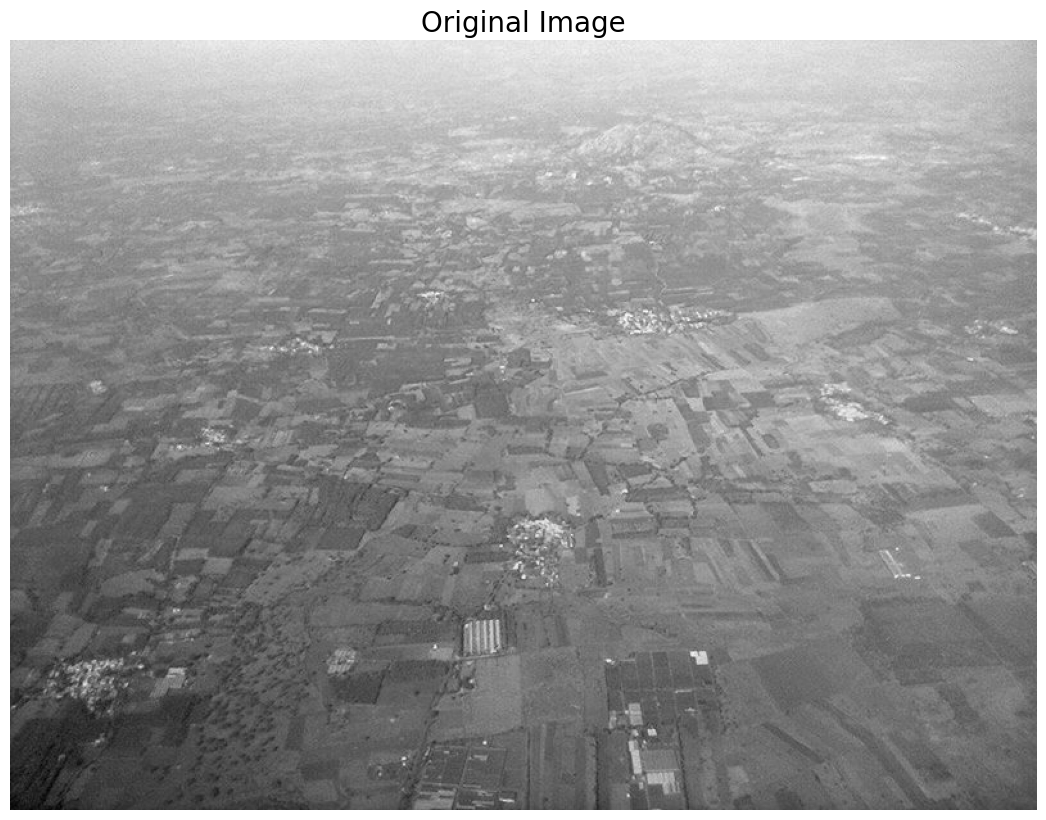

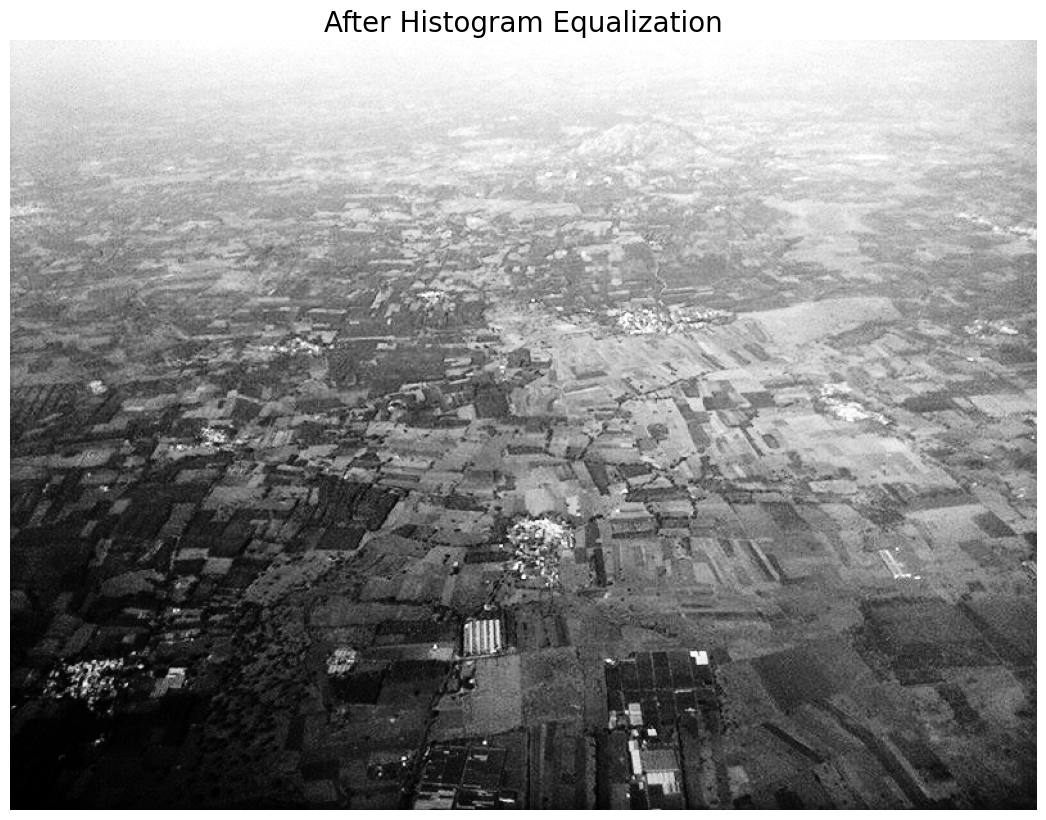

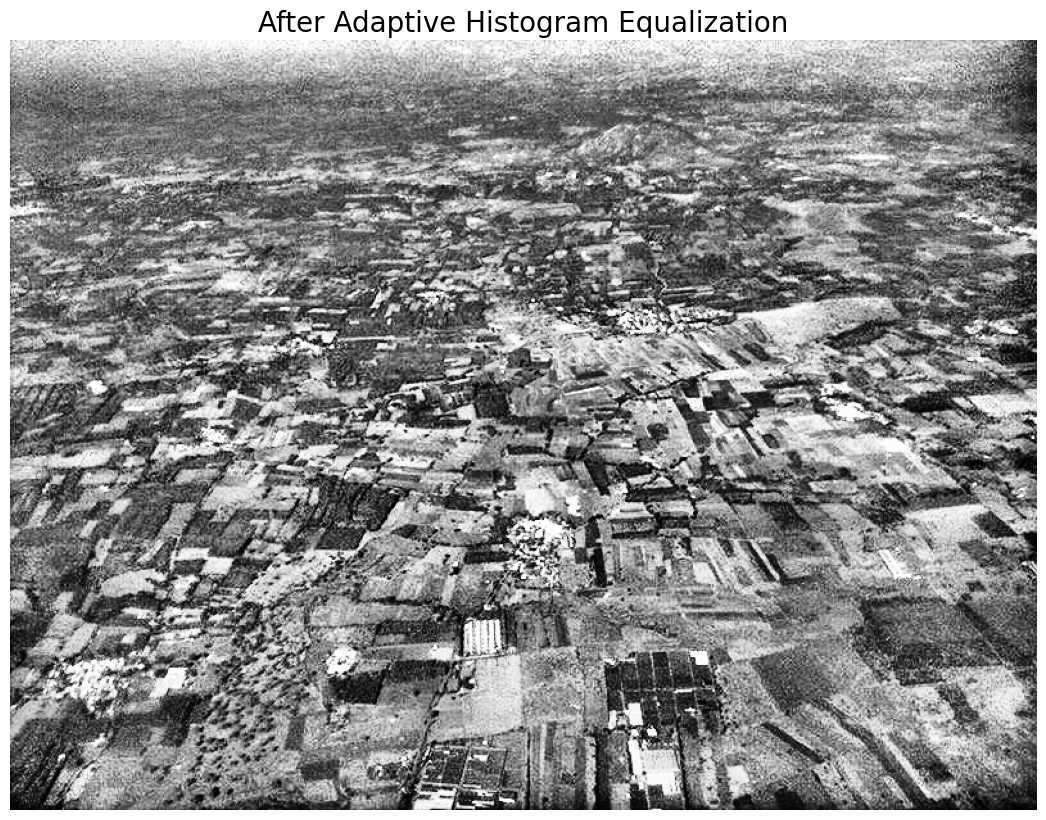

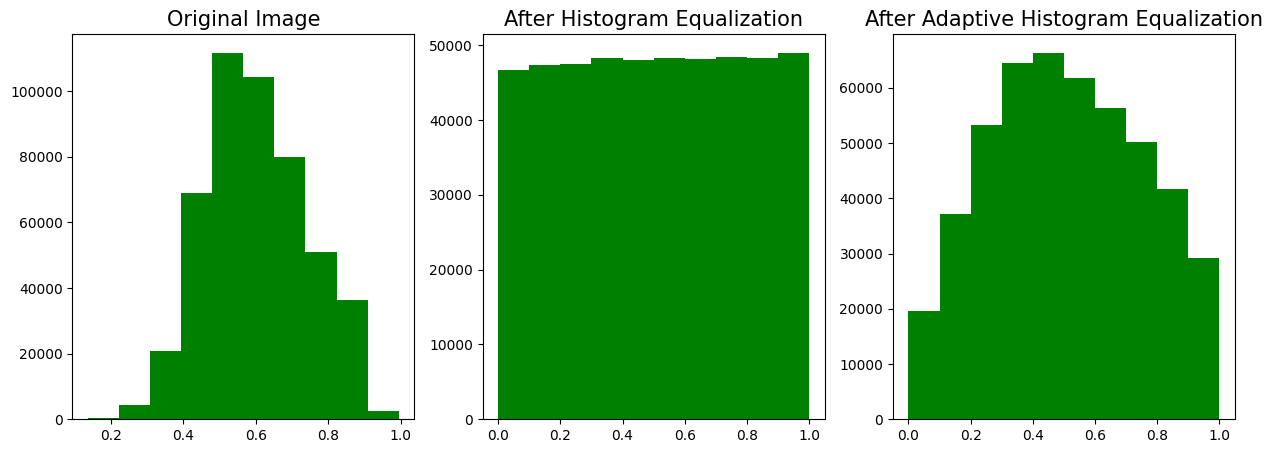

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2gray
import pylab
import os
import cv2

# Bước 1: Đọc ảnh và chuyển sang grayscale
img = rgb2gray(imread('images/earthfromsky.jpg'))  # Đọc ảnh và chuyển thành grayscale

# Bước 2: Histogram Equalization
img_eq = exposure.equalize_hist(img)  # Áp dụng Histogram Equalization

# Bước 3: Adaptive Histogram Equalization (AHE)
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)  # Áp dụng Adaptive Histogram Equalization

# Bước 4: Lưu ảnh 
output_folder = 'output_images'
output_path_eq = os.path.join(output_folder, 'chuong_4_HE(1).png')
output_path_adapteq = os.path.join(output_folder, 'chuong_4_AHE(1).png')

# Lưu ảnh Histogram Equalized và Adaptive Histogram Equalized
cv2.imwrite(output_path_eq, np.uint8(img_eq * 255))  # Lưu ảnh Histogram Equalized
cv2.imwrite(output_path_adapteq, np.uint8(img_adapteq * 255))  # Lưu ảnh Adaptive Histogram Equalized

# Bước 5: Hiển thị ảnh và histogram
pylab.gray()

# Danh sách ảnh và tiêu đề
images = [img, img_eq, img_adapteq]
titles = ['Original Image', 'After Histogram Equalization', 'After Adaptive Histogram Equalization']

# Hiển thị ảnh gốc và ảnh đã xử lý
for i in range(3):
    pylab.figure(figsize=(20, 10))
    pylab.imshow(images[i])  # Hiển thị ảnh
    pylab.title(titles[i], size=20)  # Tiêu đề cho từng ảnh
    pylab.axis('off')  # Tắt trục tọa độ

# Bước 6: Hiển thị histogram của các ảnh
pylab.figure(figsize=(15, 5))

for i in range(3):
    pylab.subplot(1, 3, i + 1)
    pylab.hist(images[i].ravel(), color='g')  # Histogram của ảnh
    pylab.title(titles[i], size=15)

# Hiển thị kết quả
pylab.show()